In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import collections
import string, sys, os, re
import warnings
import plotly.io as pio
from functools import reduce
import geotext

In [2]:
data  = pd.read_csv('D:\DataSets\companies_sorted.csv')

In [3]:
#change the name of the column since some are to long or have space which  might causes  some issues 
data = data.rename(columns={'year founded': 'founded_year', 'size range': 'size_range' ,  'linkedin url' : 'linkedin_url' , 
                                            'current employee estimate' : 'current_employee' , 'total employee estimate' : 'total_employee'})

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [6]:
#asign number to each size range so that working with it is easier 
def categorize(size):
    switcher={
        '1 - 10': 1,
        '11 - 50': 2,
        '51 - 200': 3,
        '201 - 500': 4,
        '501 - 1000': 5,
        '1001 - 5000': 6,
        '5001 - 10000': 7,
        '10001+': 8
    }
    return switcher.get(size, 0)
data['size_category'] = data['size_range'].apply(categorize)

In [10]:
data.isnull().sum()

Unnamed: 0                         0
name                               0
domain                             0
year founded                 1279102
industry                           0
size range                         0
locality                           0
country                            0
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64

In [11]:
# get the percentage of Null values
null_perceentages = data.isna().sum().sort_values(ascending=False) / len(data) * 100
null_perceentages

year founded                 32.831927
total employee estimate       0.000000
current employee estimate     0.000000
linkedin url                  0.000000
country                       0.000000
locality                      0.000000
size range                    0.000000
industry                      0.000000
domain                        0.000000
name                          0.000000
Unnamed: 0                    0.000000
dtype: float64

In [24]:
#remove duplicated rows
data=data.drop_duplicates()

In [8]:
#drop null values from specific columns
data.dropna(subset=['name', 'industry', 'country' , 'domain'], inplace=True)
data['locality'].fillna('missing',inplace = True)

In [39]:
#first part of locality seems to be city
def get_city(x) :
    geo = geotext.GeoText(x).cities
    if len(geo) > 0:
        return geo[0]
    return x.split(',')[0] 

data['city'] = data.locality.map(get_city)

In [40]:
#last part of the website name must be the domain 
def get_dom(x):
    return x.split('.')[1]

data['domain_postfix'] = data.domain.map(get_dom)

In [42]:
data.head(5)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate,city,domain_postfix
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906,new york,com
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369,bombay,com
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768,dublin,com
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958,alexandria,com
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960,london,com


In [32]:
#give an overal inight into data
data.describe()

,founded_year,current_employee,total_employee
count,2.616807e+06,3.895909e+06,3.895909e+06
mean,2.000590e+03,1.943054e+01,4.618306e+01
std,2.167837e+01,4.627793e+02,1.164119e+03
min,1.451000e+03,0.000000e+00,1.000000e+00
25%,1.997000e+03,1.000000e+00,1.000000e+00
50%,2.008000e+03,2.000000e+00,3.000000e+00
75%,2.013000e+03,5.000000e+00,1.100000e+01
max,2.103000e+03,2.740470e+05,7.169060e+05


In [33]:
data.shape

(3895909, 12)

In [25]:
#remove the first column which does not seem to be helpful
data.drop(columns=['Unnamed: 0'], inplace=True)

In [63]:
#number of companies in each industry 
data.industry.value_counts().head(5)

information technology and services    453044
marketing and advertising              338162
construction                           257921
management consulting                  194556
real estate                            193486
Name: industry, dtype: int64

In [14]:
#Top 10 counteries which have the highest employee population
most_populated = data.groupby('country' , sort=True).sum().sort_values(by='total_employee' , ascending = False).head(10)['total_employee']
most_populated

country
united states     90078530
united kingdom    15157960
canada             6896811
france             6525730
india              6336435
netherlands        5685934
brazil             4149458
australia          3726449
spain              3425574
germany            3264146
Name: total_employee, dtype: int64

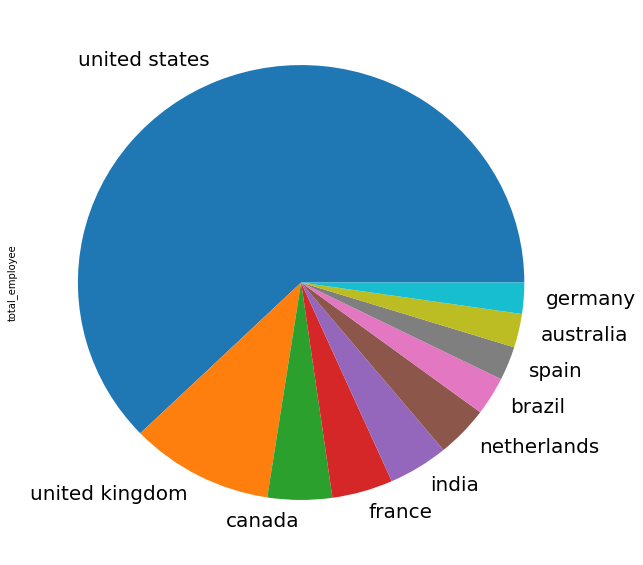

In [31]:
most_populated.plot(kind='pie' ,figsize= (10,10) ,fontsize=20 )

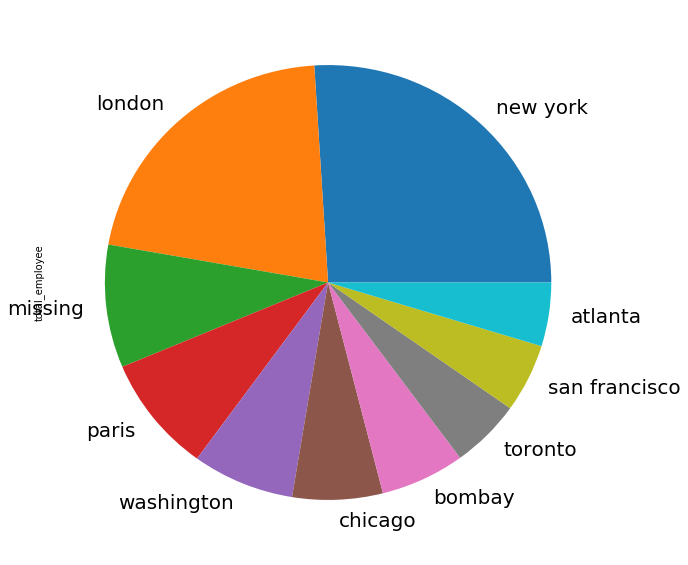

In [47]:
#find the distriution of employee population in US (or any other company)
US_most_populated=data[data.country == 'united states']
US_most_populated = data.groupby('city' , sort=True).sum().sort_values(by='total_employee' , ascending = False).head(10)['total_employee']
US_most_populated.plot(kind='pie' , figsize= (10,10) ,fontsize=20 )

In [50]:
#lets see what is the highest populated company and distribution of its population in the world 
most_populated = data.groupby('name' , sort=True).sum().sort_values(by='total_employee' , ascending = False).head(5)['total_employee']
most_populated

name
ibm                716918
accenture          455768
us army            445971
ey                 428960
hewlett-packard    412956
Name: total_employee, dtype: int64

In [58]:
IBM_population=data[data.name == 'ibm']
IBM_population = IBM_population.groupby('country' , sort=True).sum().sort_values(by='total_employee' , ascending = False).head(10)['total_employee']
IBM_population

country
united states    716906
israel               12
Name: total_employee, dtype: int64

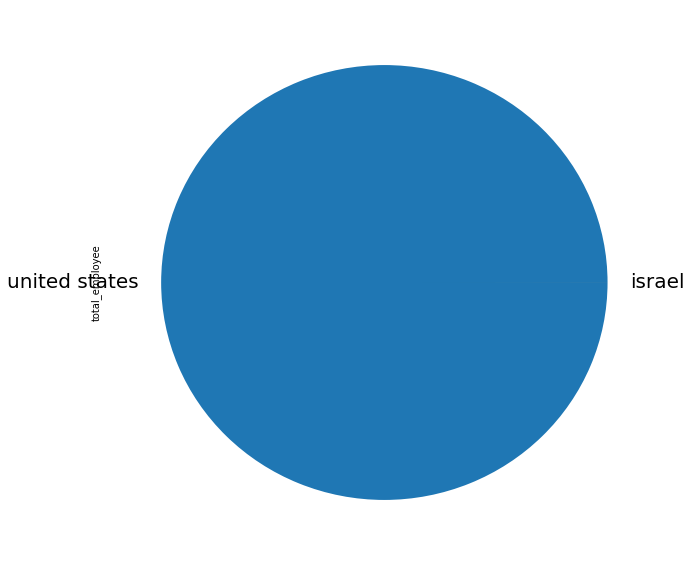

In [59]:
IBM_population.plot(kind='pie' , figsize= (10,10) ,fontsize=20 )

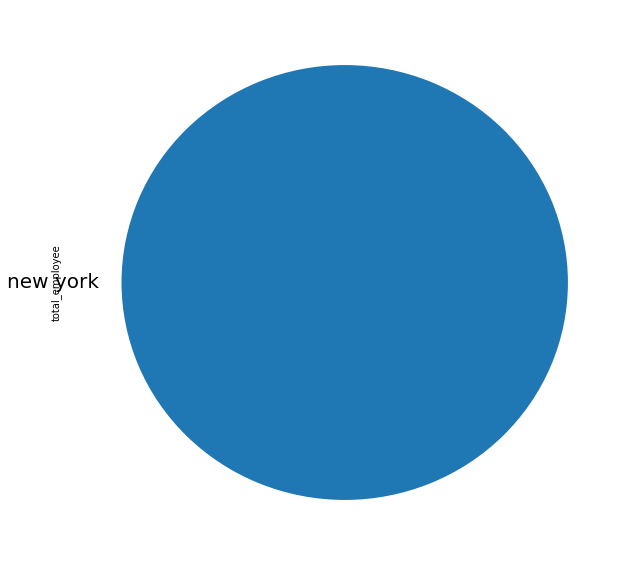

In [63]:
IBM_population=data[data.name == 'ibm']
IBM_city=IBM_population[IBM_population.country=='united states']
IBM_city = IBM_city.groupby('city' , sort=True).sum().sort_values(by='total_employee' , ascending = False).head(10)['total_employee']
IBM_city.plot(kind='pie' , figsize= (10,10) ,fontsize=20 )

In [77]:
#name of the oldest company 
oldest = data[data.founded_year == data.founded_year.min()]
oldest

,Unnamed: 0,name,domain,founded_year,industry,size_range,locality,country,linkedin_url,current_employee,total_employee
2191,4925678,university of glasgow,gla.ac.uk,1451.0,research,5001 - 10000,"glasgow, glasgow city, united kingdom",united kingdom,linkedin.com/company/university-of-glasgow,4005,10503


In [35]:
#name of the company with the highest number of employees 
most_populated = data[data.current_employee == data.current_employee.max()]
most_populated

,Unnamed: 0,name,domain,founded_year,industry,size_range,locality,country,linkedin_url,current_employee,total_employee
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA3727A390>]],
      dtype=object)

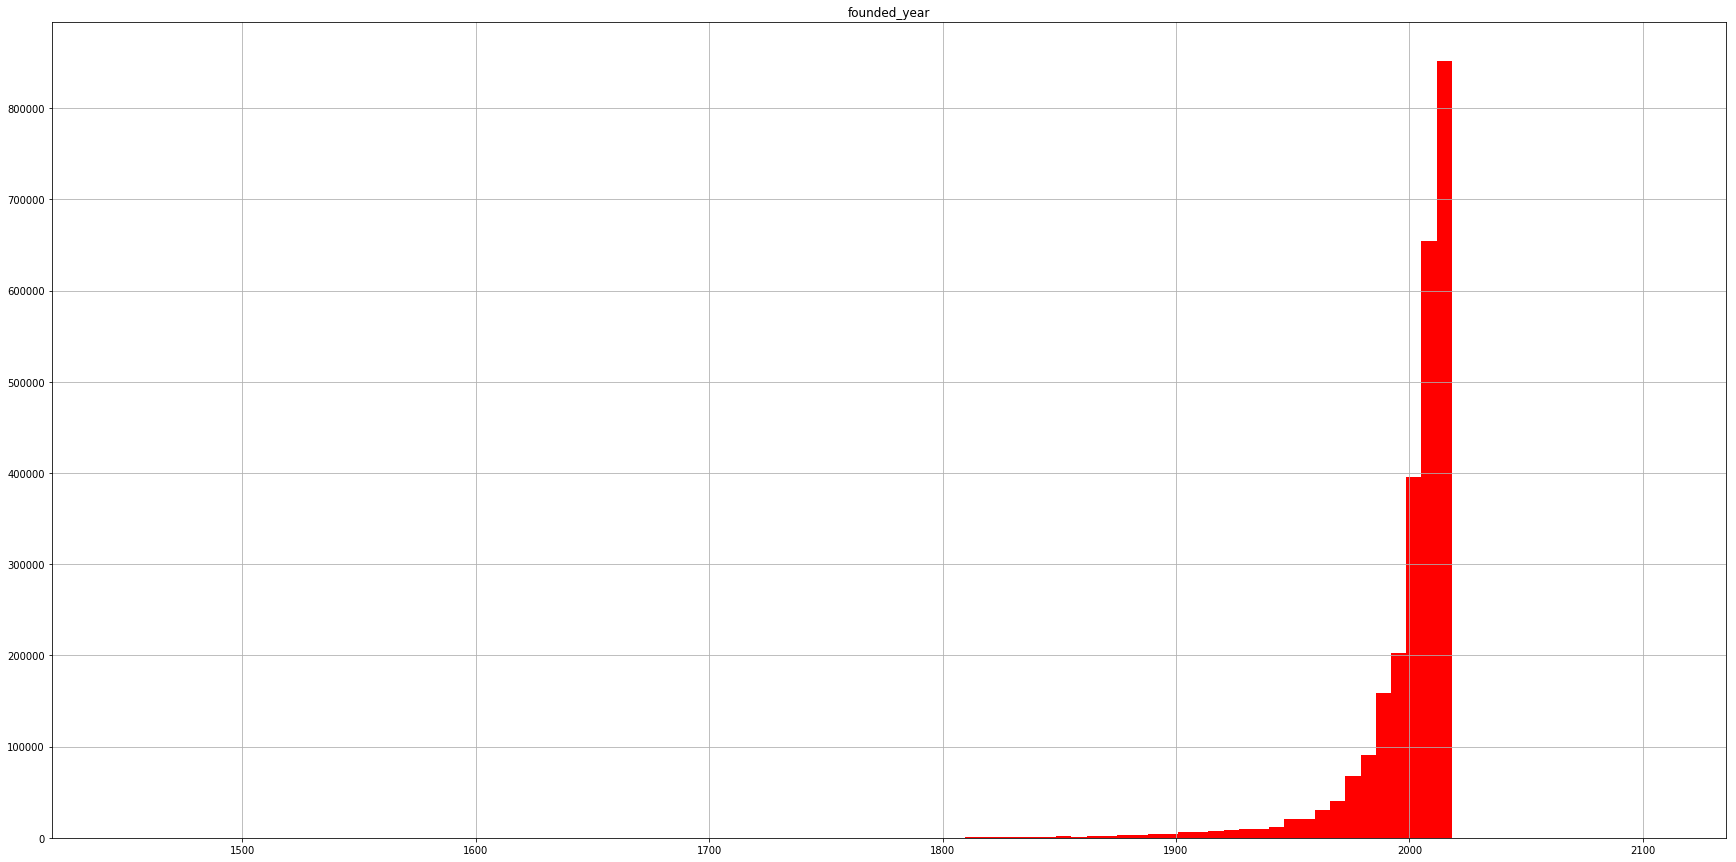

In [84]:
#the change in the number of companies over time
data.hist('founded_year',bins = 100 , figsize= (30,15) , color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAED505828>]],
      dtype=object)

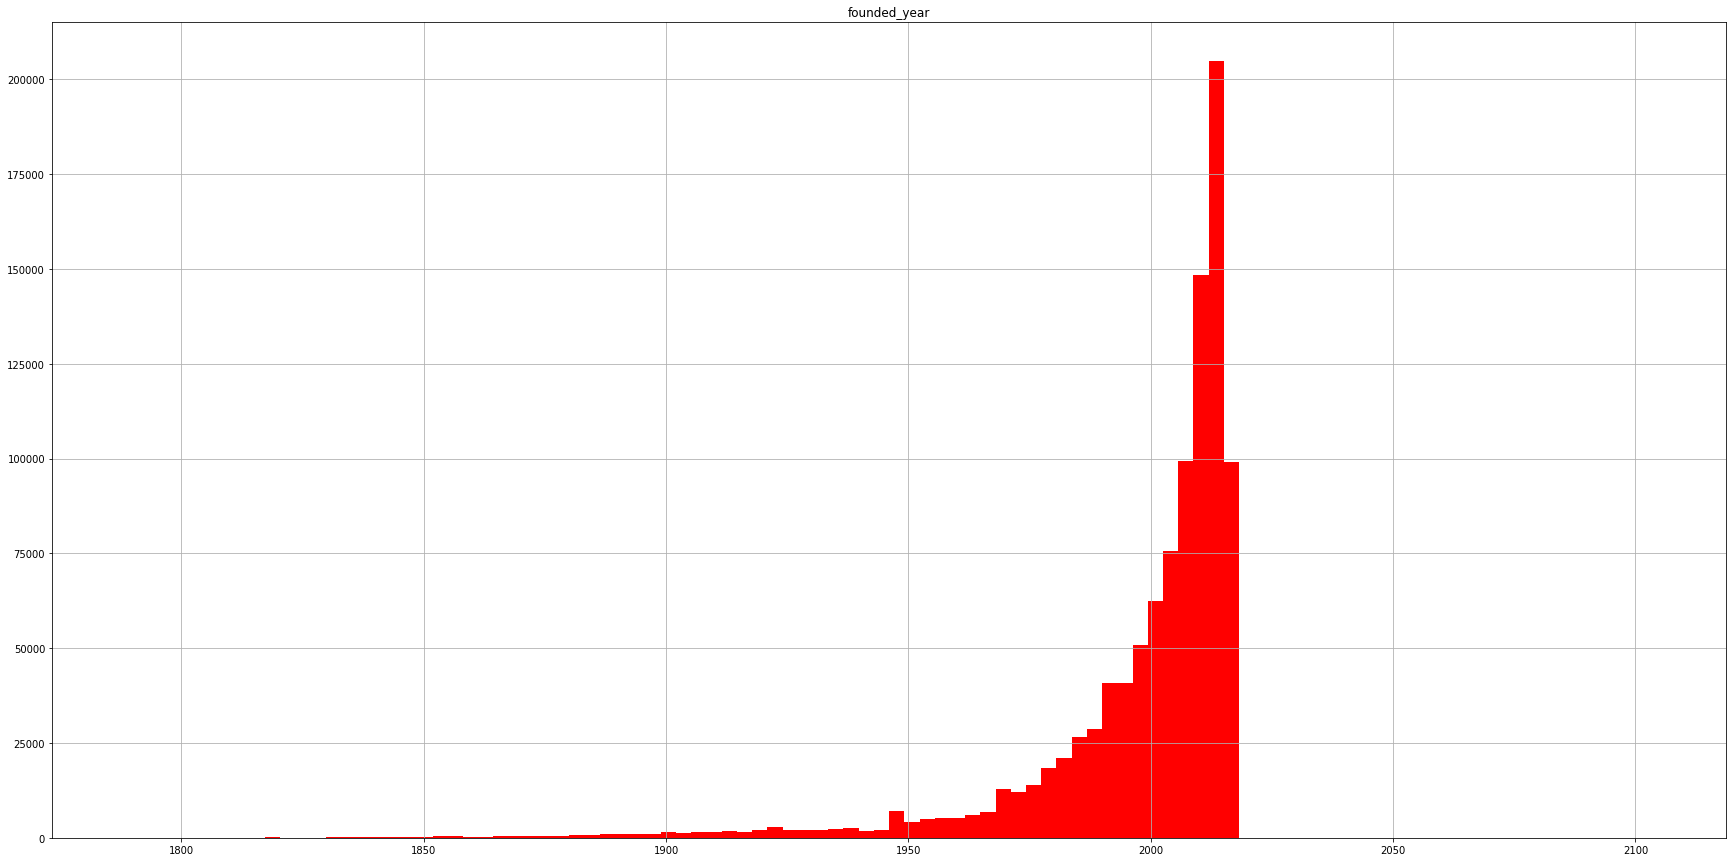

In [128]:
#the change in the number of companies  in US over time
data_US= data.loc[data['country']=='united states']
data_US.hist('founded_year',bins = 100 , figsize= (30,15) , color='red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E5FF18358>,
      dtype=object)

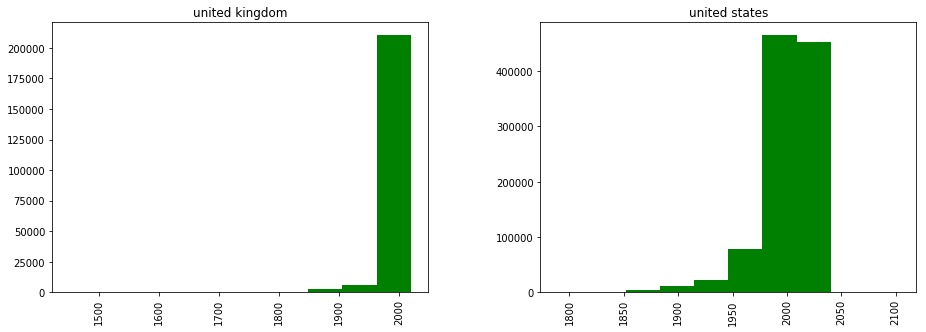

In [40]:
#copmare different countries in regards to number of  the companies 
compare_countries = data[(data.country =='united kingdom') | (data.country =='united states' ) ]
compare_countries.hist(column='founded_year', by='country', figsize= (15,5) , color='green')

In [84]:
#number of companies based on size ranges
grouped_size=data.size_category.value_counts()
grouped_size

1    2822097
2     748374
3     229211
4      55021
5      19871
6      17371
7       2312
8       1652
Name: size_category, dtype: int64

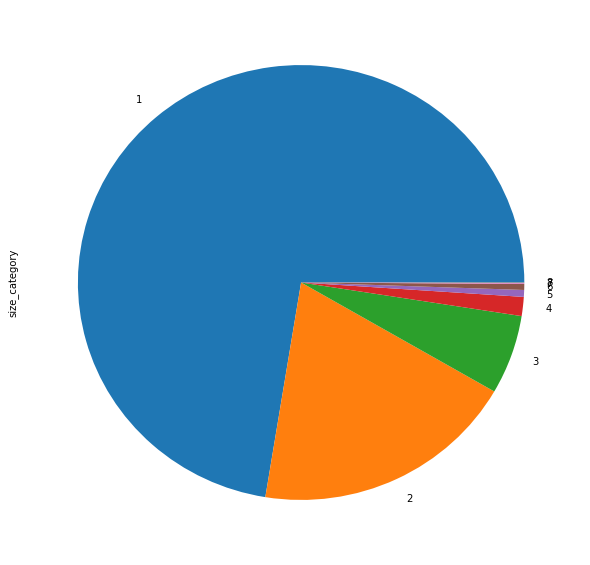

In [83]:
grouped_size.plot(kind='pie' , figsize= (10,10) )

In [43]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,founded_year,current_employee,total_employee,locality_word_in_name_count
founded_year,1.000000,-0.077031,-0.077427,-0.061053
current_employee,-0.077031,1.000000,0.973332,0.005590
total_employee,-0.077427,0.973332,1.000000,0.004752
locality_word_in_name_count,-0.061053,0.005590,0.004752,1.000000


In [126]:
irland.set_index(irland.domain_postfix)
irland

,country,domain_postfix,industry
5459,ireland,ie,10046
5430,ireland,com,7474
5429,ireland,co,302
5483,ireland,net,236
5490,ireland,org,229
5442,ireland,eu,194
5462,ireland,io,110
5517,ireland,tv,28
5476,ireland,me,22
5407,ireland,aero,22


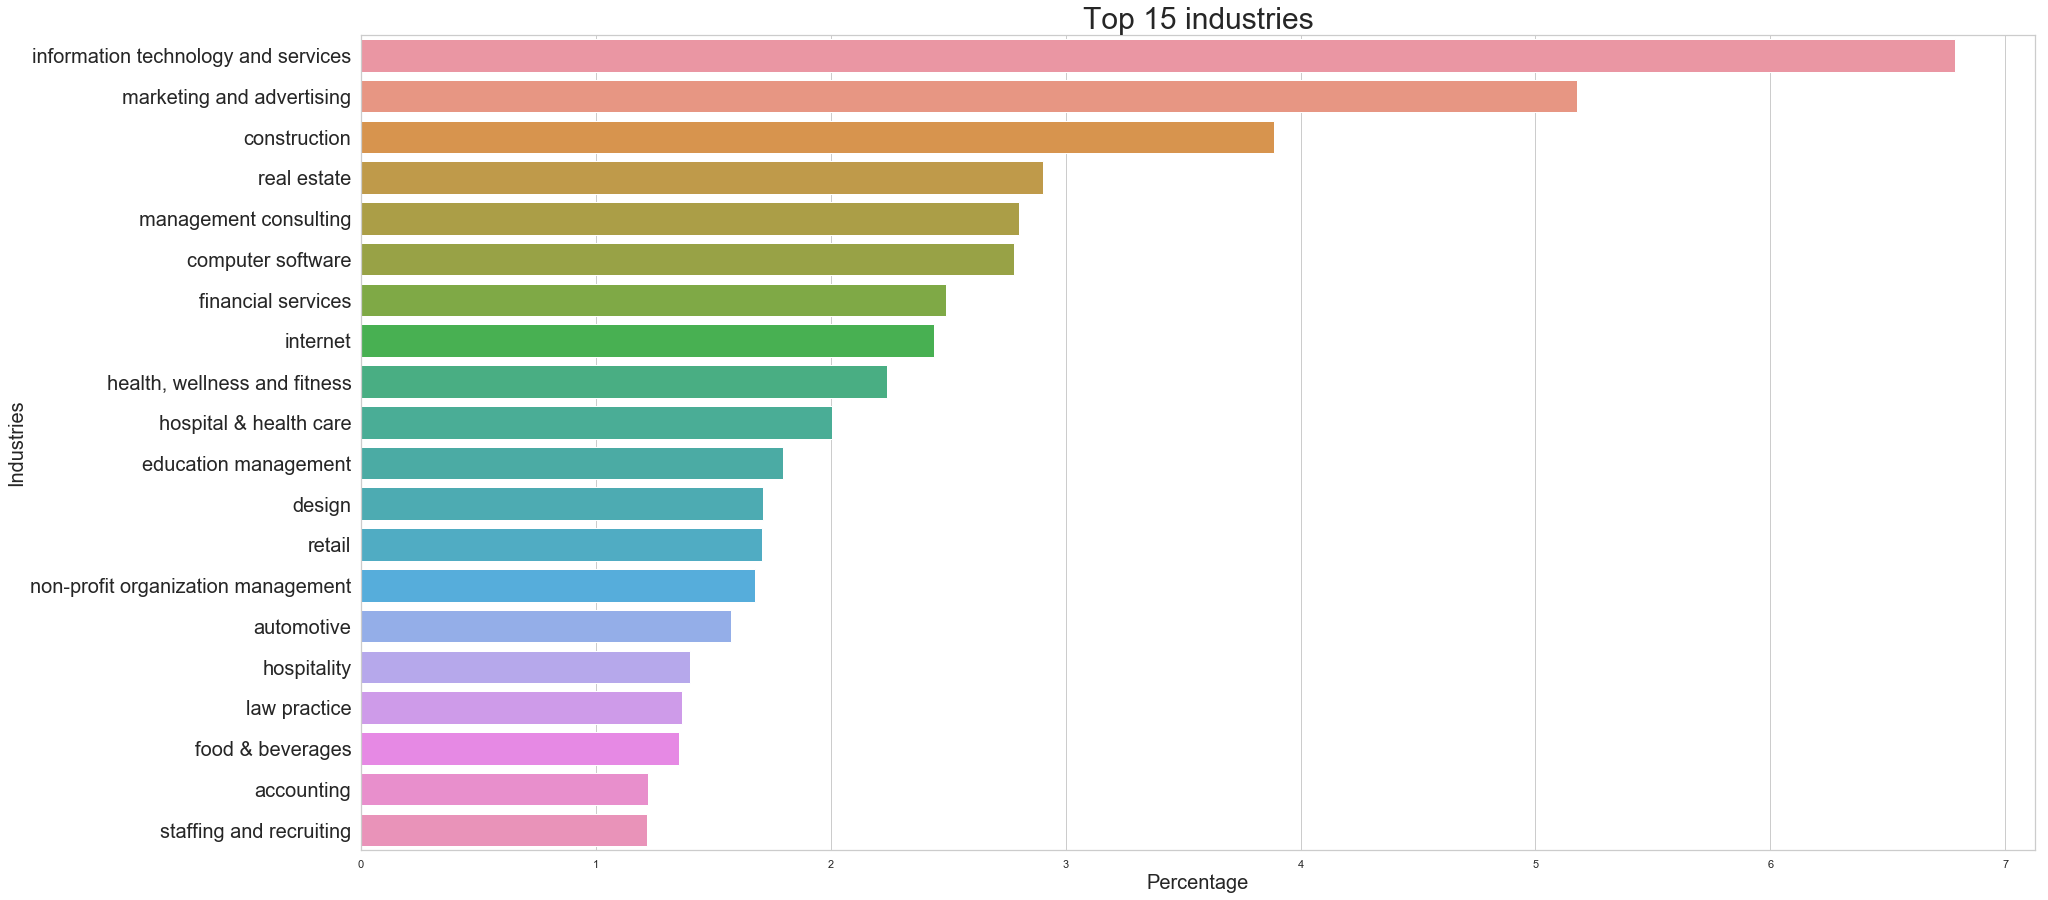

In [120]:
country_percentage = data['industry'].value_counts() * 100/len(data)
sns.set(style="whitegrid")
plt.figure(figsize=(30,15))
plt.yticks(fontsize=20)
sns.barplot(country_percentage.values[:20], country_percentage.index[:20])

plt.title('Top 15 industries',fontsize=30)
plt.ylabel('Industries', fontsize=20)
plt.xlabel('Percentage',fontsize=20)

plt.show();

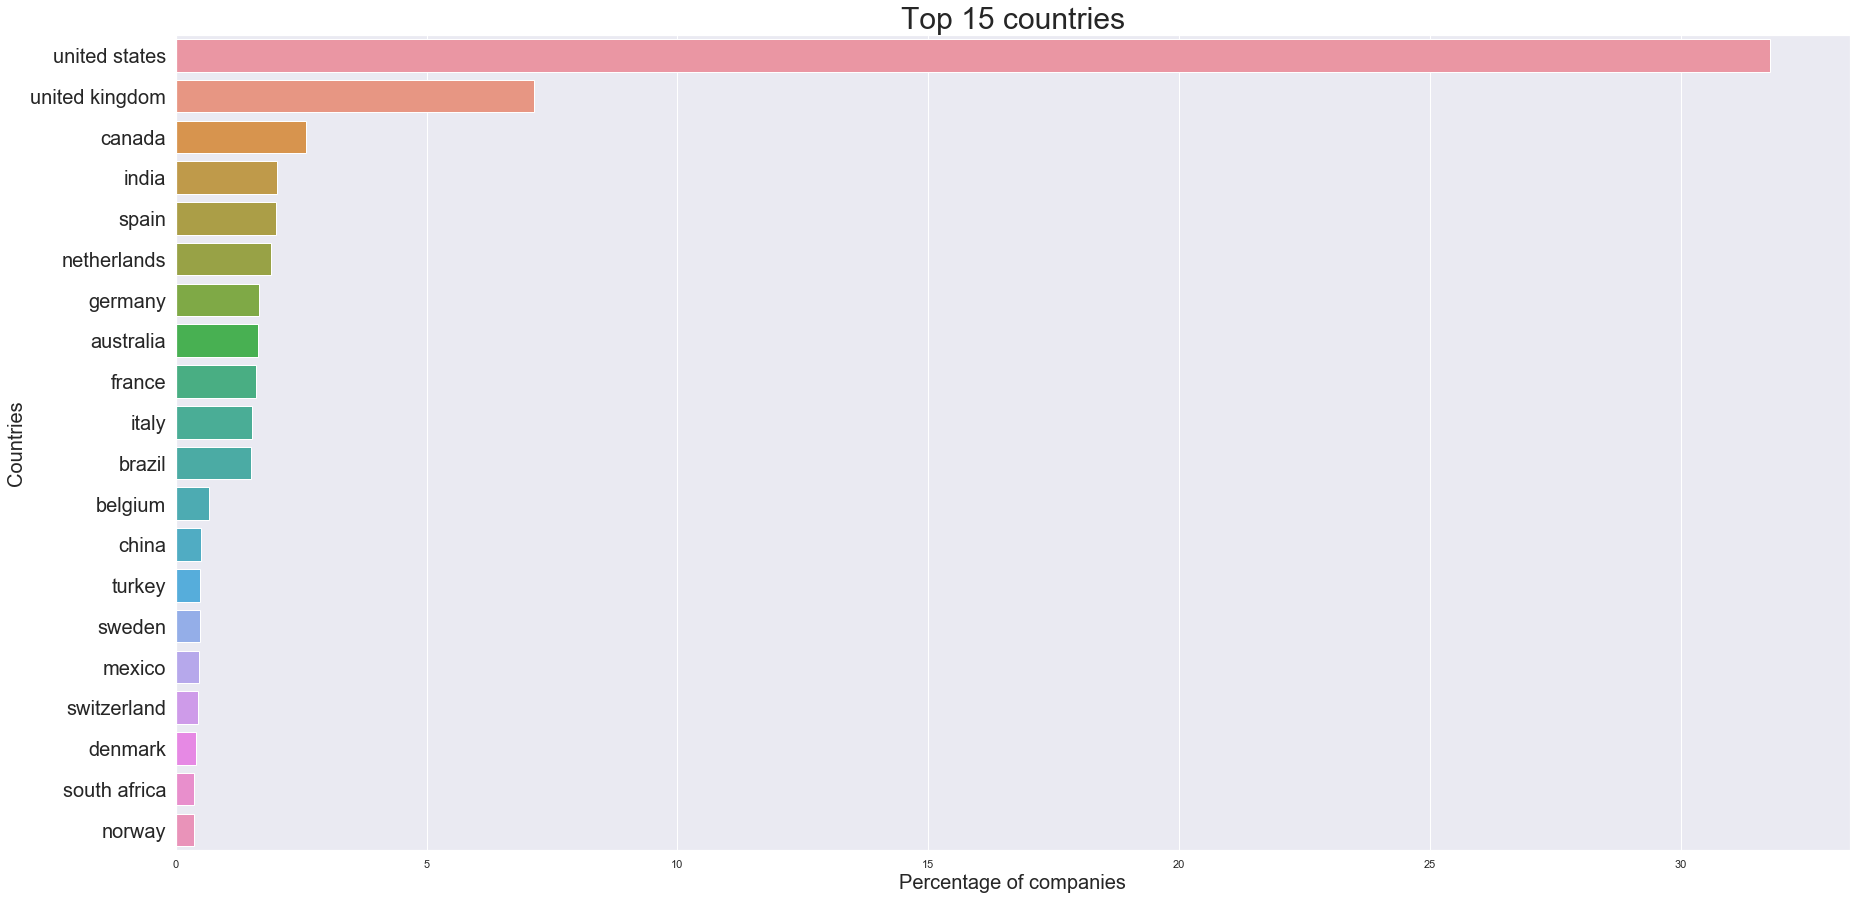

In [33]:
# Counttry_count
country_percentage = data['country'].value_counts() * 100/len(data)
sns.set(style="whitegrid")
plt.figure(figsize=(30,15))
plt.yticks(fontsize=20)
sns.barplot(country_percentage.values[:20], country_percentage.index[:20])

plt.title('Top  countries',fontsize=30)
plt.ylabel('Countries', fontsize=20)
plt.xlabel('Percentage of companies',fontsize=20)

plt.show();

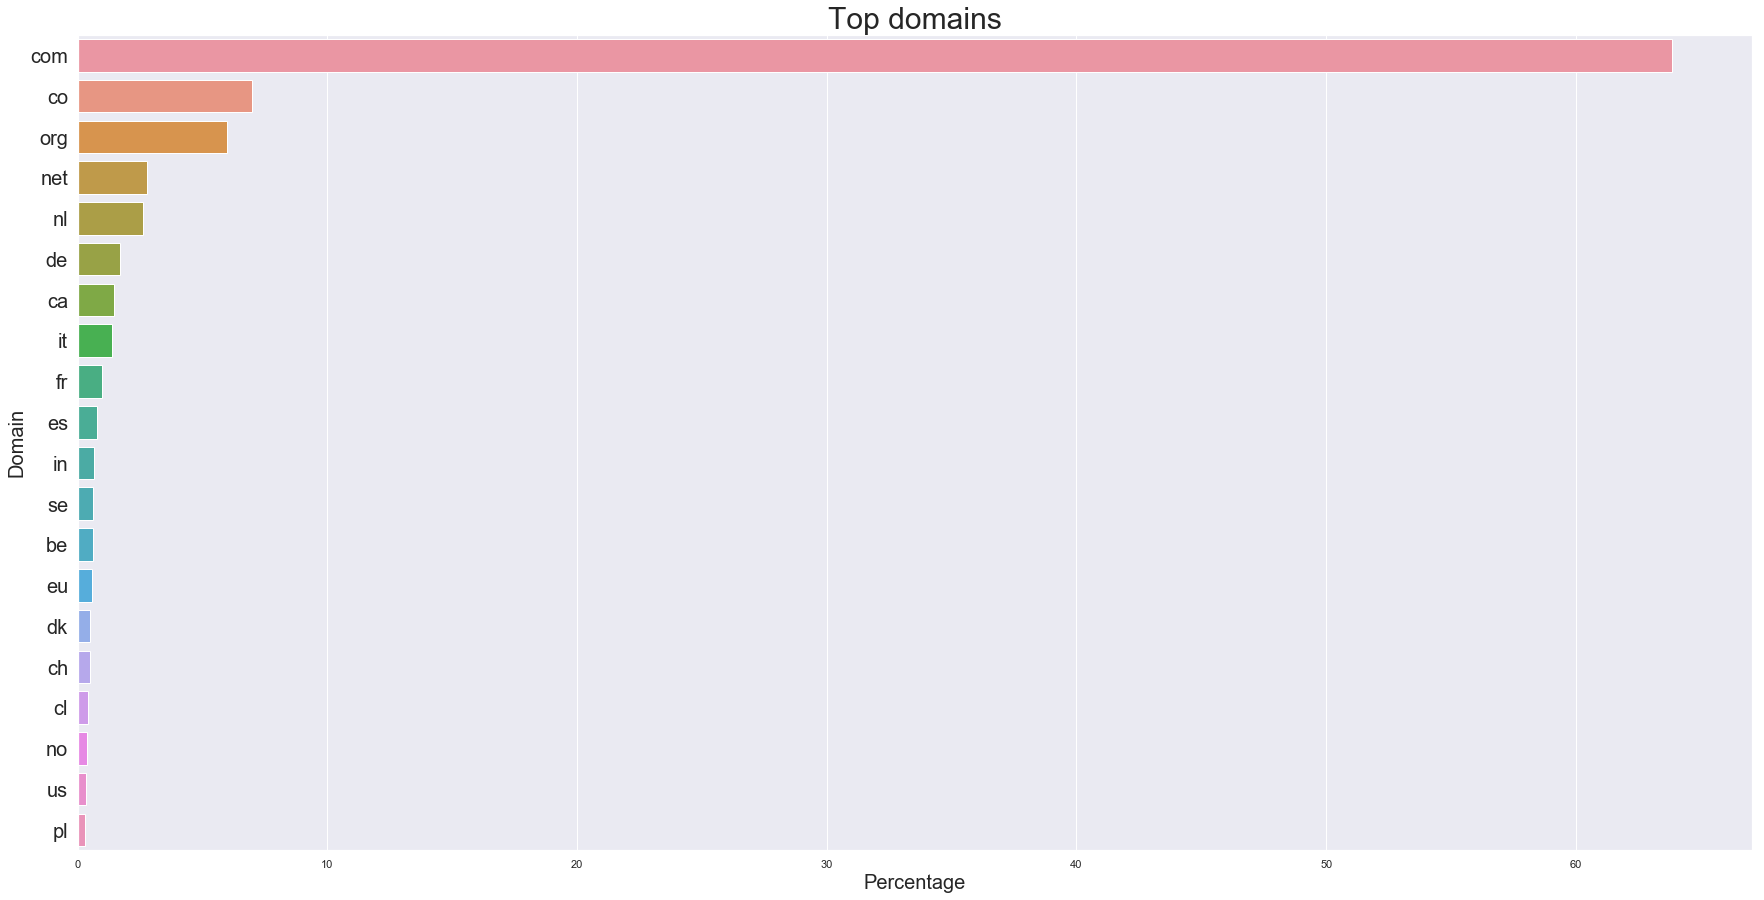

In [116]:
domain_percentage = data['domain_postfix'].value_counts() * 100/len(data)
sns.set(style="darkgrid")
plt.figure(figsize=(30,15))
plt.yticks(fontsize=20)
sns.barplot(country_percentage.values[:20], domain_percentage.index[:20])

plt.title('Top domains',fontsize=30)
plt.ylabel('Domain', fontsize=20)
plt.xlabel('Percentage',fontsize=20)

plt.show();

In [105]:
#the most popular domain postfix in each country
top_domains.groupby('country', as_index=False).apply(lambda x: x.domain_postfix[x.industry.idxmax()])

,country,NaN
0,afghanistan,com
1,albania,al
2,algeria,com
3,american samoa,as
4,andorra,com
...,...,...
231,western sahara,com
232,yemen,com
233,zambia,com
234,zimbabwe,co


In [72]:
# number of companies based on size range
count_per_range = data['size range'].value_counts().rename_axis('size range').reset_index(name='count')
count_per_range

,size range,count
0,1 - 10,5585399
1,11 - 50,1126610
2,51 - 200,324853
3,201 - 500,78494
4,501 - 1000,28394
5,1001 - 5000,24537
6,5001 - 10000,3044
7,10001+,2095


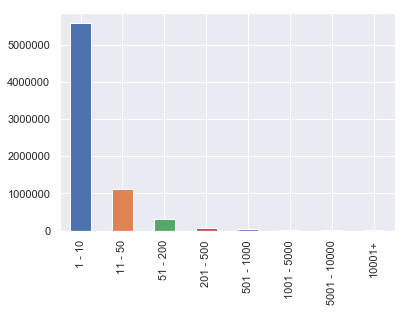

In [82]:
count_per_range_plot = data['size range'].value_counts().plot(kind='bar')

In [ ]:
repetettive_names = data['name'].value_counts().rename_axis('name').reset_index(name='count')
repetettive_names.plot(kind='bar')

In [ ]:
#the most common words for each industry 

In [ ]:
def append_list(a,b):
    return a + b
all_words = reduce(append_list, list(industry_name_words_dict.values()))

In [13]:
industries = list(data['industry'].unique())
industry_name_words_dict = {}
for industry in industries:
    industry_df = data[data['industry'] == f'{industry}']
    text = " ".join(name for name in industry_df.name)
    word_list = list(filter(lambda x: x!= '', re.split(r'\s|-', text)))
    common_words = [pair[0] for pair in collections.Counter(word_list).most_common(50)]
    industry_name_words_dict[f'{industry}'] = common_words

In [ ]:
common_words = [pair[0] for pair in dict(collections.Counter(all_words)).items() if pair[1] > 20]
words_to_be_removed = common_words + re.split(r'',string.punctuation) + list(STOPWORDS)

In [ ]:
for (industry, words) in industry_name_words_dict.items():
    industry_name_words_dict[industry] = [word for word in words if word not in words_to_be_removed]

In [17]:
industry_name_words_dict['information technology and services']

['solutions',
 'ltd',
 'inc.',
 'technologies',
 'llc',
 'it',
 'consulting',
 'technology',
 'limited',
 'services',
 'ltd.',
 'systems',
 'group',
 'inc',
 'gmbh',
 'software',
 '&',
 'business',
 'pvt.',
 'pvt',
 'digital',
 'computer',
 'tech',
 'data',
 'the',
 'srl',
 'web',
 'de',
 'information',
 'and',
 'e',
 'solutions,',
 'global',
 'ab',
 'private',
 'corporation',
 'media',
 'india',
 'ag',
 'tecnologia',
 'pty',
 'infotech',
 'management',
 'network',
 'international',
 'of',
 'company',
 's.a.',
 's.r.l.',
 'solution']